In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas

 - Fundamental data structures: `Series`, `DataFrame` and `Index`
 
 ### Series
 
 Series is the fancy version of python built-in dictionaries. Series is an analog of a one-dimensional array with flexible indices.
 
 ### DataFrame
 
 DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.
 
 ### Index
 
 Used in Series and DataFrame. It is like immutable array. It also operates like set such that union, intersection and difference operations are allowed.

In [17]:
# Similar to dictionary

data = pd.Series(np.arange(6) + 5)
print(data)
print(data.values)

# Can be constructed from dictionary directly

print()
d = {"foo":10, "bar":12, "baz":11}
data = pd.Series(d)
print(data)

# Unlike dictionary, it is sorted
print()
print(data["bar":"baz"]) # Strangly it also includes data["baz]

# Index parameter can be given explicitly
print()
data = pd.Series([10, 100, 1, 1000], index = [1, 2, 0, 3])
print(data)

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64
[ 5  6  7  8  9 10]

bar    12
baz    11
foo    10
dtype: int64

bar    12
baz    11
dtype: int64

1      10
2     100
0       1
3    1000
dtype: int64


In [25]:
# DataFrame is like a table

# Can be created from dict
data = pd.DataFrame([{"a": 1, "b": 2}, {"a":0, "b": 2}, {"a":10, "b": -5}])
print(data)

# even if some values are missing
print()
data = pd.DataFrame([{"a": 1, "b": 2}, {"a":0, "b": 2}, {"a":10}])
print(data)

print(data.columns)

# from series
print()
s = pd.Series({"foo":10, "bar":12, "baz":11})
data = pd.DataFrame(s, columns=["col id"])
print(data)

# or dict of series
print()
data = pd.DataFrame({"col id":s})
print(data)

    a  b
0   1  2
1   0  2
2  10 -5

    a    b
0   1  2.0
1   0  2.0
2  10  NaN
Index(['a', 'b'], dtype='object')

     col id
bar      12
baz      11
foo      10

     col id
bar      12
baz      11
foo      10


## Indexing and Selection

When we do numpy like indexing, a confusion may arise whether we meant explicit or implicit indices. Since "Explicit is better than implicit", we use related methods `loc`, `iloc`. The same logic applies to both Series and DataFrames.

 - `ix` is like hybrid of `loc` and `iloc`. Again it might be dangerous if indices are integer.

In [28]:
data = pd.Series(["a", "b", "c"], index = [1, 3, 5])
print(data)

print(data.loc[1:3]) # Note that 3 is included in explicit slicing
print(data.iloc[1:3])

1    a
3    b
5    c
dtype: object
1    a
3    b
dtype: object
3    b
5    c
dtype: object


## Time Series Examples

TODO: 

In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web

plt.figure(figsize=(10,8))

f = web.DataReader('GOOG', 'morningstar', start='2004', end='2016')

(462, 5)
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


TypeError: Cannot convert input [('GOOG', Timestamp('2014-03-27 00:00:00'))] of type <class 'tuple'> to Timestamp

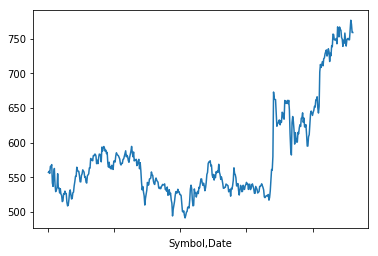

In [30]:
close = f["Close"]
print(f.shape)
print(f.columns)
close.plot()

f.asfreq("BA").plot(style="--")
close.plot()